# Project Vis 3: Urban vs. Rural Access to Safely Managed Drinking Water

## Goal
This chart compares the percentage of people with access to safely managed drinking water services in urban and rural areas across five countries. The year 2022 was chosen because it is the most recent year with complete data for all selected countries, making the comparison fair and easy to understand.

## Why These Countries?
These five countries were selected because they have complete urban and rural data in 2022 for SDG 6.1.1. The countries also represent different regions and levels of development:
- Bangladesh: South Asia
- Brazil: Latin America
- Viet Nam: Southeast Asia
- France: Western Europe
- Germany: Central Europe

## Data Source
- File: washdash-download.csv
- Source: WHO/UNICEF Joint Monitoring Programme (JMP)
- Website: https://washdata.org/data/household

## 1. Load and Filter the Data

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("washdash-download.csv")

# Filter for 2022, drinking water, safely managed service, and urban/rural
df_filtered = df[
    (df['Year'] == 2022) &
    (df['Service Type'] == 'Drinking water') &
    (df['Service level'] == 'Safely managed service') &
    (df['Residence Type'].isin(['urban', 'rural']))
]

# Final selected countries
selected_countries = ['Bangladesh', 'Brazil', 'Viet Nam', 'France', 'Germany']
df_vis = df_filtered[df_filtered['Country'].isin(selected_countries)]

## 2. Prepare Data for Visualization

We will pivot the data to show urban and rural coverage side-by-side for each country.

In [115]:
# Pivot for plot
df_plot = df_vis.pivot(index='Country', columns='Residence Type', values='Coverage')
df_plot

Residence Type,rural,urban
Country,,
Bangladesh,62.33870,54.10609
Brazil,76.01856,88.85638
France,98.40000,100.00000
Germany,99.63912,99.99624
Viet Nam,46.39446,75.76801


## 3. Visual: Urban vs. Rural Drinking Water Access (2022)

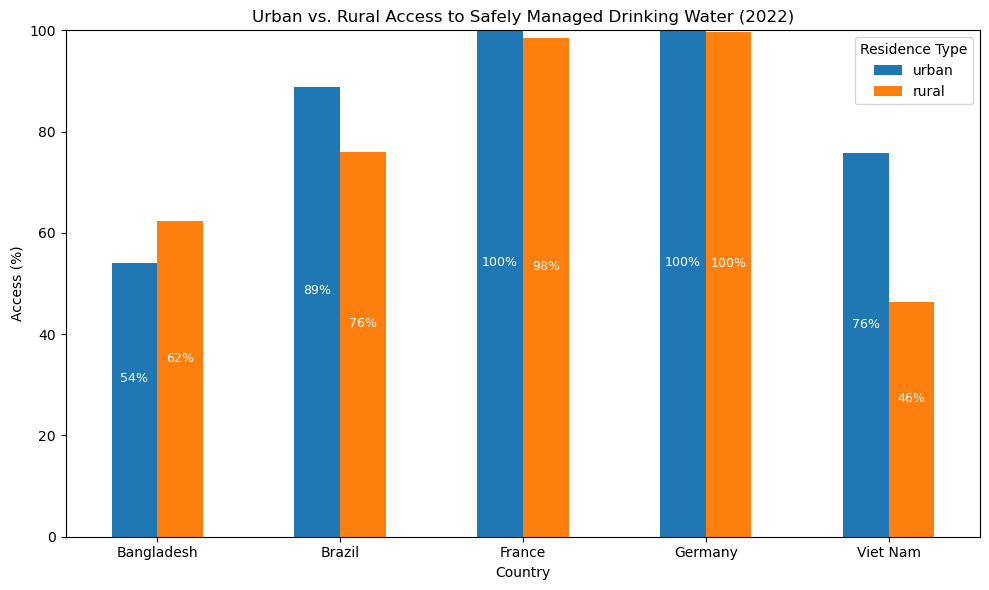

In [143]:
# Plot grouped bar chart
df_plot = df_plot[['urban', 'rural']]
ax = df_plot.plot(kind='bar', figsize=(10, 6))

plt.title('Urban vs. Rural Access to Safely Managed Drinking Water (2022)')
plt.ylabel('Access (%)')
plt.xlabel('Country')
plt.ylim(0, 100)
plt.xticks(rotation=0)
plt.legend(title='Residence Type')

# Add percentage labels 
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f%%', label_type='center', fontsize=9, color='white', padding=15)

plt.tight_layout()
plt.show()

## Explanation :

This chart shows the percentage of people who have access to safely managed drinking water in urban and rural areas for five countries.

- **France and Germany** have very high access in both areas (close to 100%).
- **Bangladesh** is the only country where rural access is higher than urban.
- **Brazil** has high access in urban areas but lower in rural areas.
- **Viet Nam** shows a big difference: 76% in urban areas but only 46% in rural areas.

Overall, urban areas usually have better access than rural areas except in Bangladesh.

## In conclusion : 
This chart helps show which countries need more support and shows the gap between people who have safe water and those who don’t.